# Simple Propeller Analysis

In order to get some idea about how the propeller will work, we can use some simple tools to get at least a first order estimate. The theory behind these tools is readily available from a variety of sources. I am using one of my textbooks from back in my college days: *Aerodynamics for Engineering Students* {cite}`houghton1966`, specifically chapter 7 *Airscrews and Propulsion*. To make sure my equations are consistent, I will be using *SymPy* to manage the math.

In [14]:
import sympy
import os
import sys
from pathlib import Path
cwd = !pwd
pagedir = Path(cwd[0])

projpath = pagedir / ".." / ".."
projdir = projpath.absolute().as_posix()
if not projdir in sys.path:
        sys.path.insert(0,projdir)

We start off with Frounde's *Momentum Theory of Propulsion* which looks at a propeller in a simple way.

Assume that the propeller can be replaced by a simple *actuator disc* with a radius $R$ equal to the propeller radius in size. Air will approach this disc from a uniform free stream which is moving at some velocity $V_\infty$. The incoming air will have some initial pressure $P_\infty$ and density %\rho_\infty$. Here is a simple diagram showing this setup:

In [15]:
%reload_ext tikzmagic

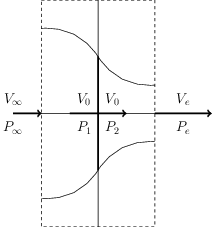

In [16]:
%%tikz
\tikzstyle{every node}=[font=\Large]
\draw [thin, dashed](0,7) -- (4,7) -- (4,-1) -- (0,-1) -- cycle;
\draw [thin] (2,7) -- (2,-1);
\draw [thin](-1,3) -- (6,3);
\draw [ultra thick,->] (-1,3) -- (0,3);
\draw [ultra thick, ->](4,3) -- (6,3);
\draw [ultra thick, ->] (1,3) -- (3,3);
\draw [ultra thick] (2,1) -- (2,5);
% draw stream tube
\draw (0,0)  
    to [bend right] (2,1) 
    to [bend left] (4,2);
\draw (0,6)
    to [bend left] (2,5)
    to [bend right] (4,4);
% add labels
\node at (-1,3.5) {$V_\infty$};
\node at (-1,2.5) {$P_\infty$};
\node at (1.5,3.5) {$V_0$};|
\node at (1.5,2.5) {$P_1$};
\node at (2.5,3.5) {$V_0$};|
\node at (2.5,2.5) {$P_2$};
\node at (5,3.5) {$V_e$};
\node at (5,2.5) {$P_e$};

Far downstream of the propeller, the air will again be uniform, but it will have new properties. We will name there $V_e$ and $P_e$. The density will be assumed constant, meaning that  in this analysis the flow is incompressible, which is reasonable for our models.

The propeller disc is called an *actuator disc* which causes an increase in pressure in the air passing through the disk. The velocity of the air on either side of the disc is assumed to be uniform over the entire disc. 

There is some amount of air ahead of the disk that will arrive at the disk itself. We can enclose this segment of the air in a tube, called a stream tube. It has a larger diameter ahead of the disc, and shrinks as the air reaches the disc surface. The air will have increased in speed as the tube contracts. The pressure will also increase to some value on the upstream side of the disc. We will call this $P_1$ and the new velocity will be $V_0$.

The actuator disc will increase the pressure to a new value we will call $P_2$. The velocity through the disc will be constant, but the increase in pressure will accelerate the flow and it will reach a new value, $V_s$ at the exit of the stream tube. The pressure at the exit will return to $P_\infty$.

Since the air mass on either side of the disc must be equal we can show that the velocity on either side of the disc is the same as well. If we add in Bernoulli's equation on either side of the disc, we can come up with an interesting equation:

Let's set up **sympy** with these variable names:

In [17]:
V_inf, P_inf, rho_inf = sympy.symbols('V_inf P_inf rho_inf')
V_0, V_s, P_1, P_2 = sympy.symbols('V_0 V_s P_1 P_2')
R = sympy.symbols('R')

The area of the disc is given by this equation:

In [18]:
S = sympy.pi*R**2
S

pi*R**2

The mass of air reaching the disc is given by:

In [19]:
M = rho_inf*V_0*S
M

pi*R**2*V_0*rho_inf

The increase in momentum of the fluid is the thrust created by the actuator disc, $T$:

In [20]:
T = rho_inf*S*V_0*(V_s - V_inf)
T

pi*R**2*V_0*rho_inf*(-V_inf + V_s)

\begin{equation}
T = \pi R^2 \rho_\infty(V_s - V_\infty)
\end{equation}

We can also calculate the thrust using the pressure difference across the disc:

In [21]:
T2 = S*(P_2 - P_1)
T2

pi*R**2*(-P_1 + P_2)

\begin{equation}
T = \pi R^2(P_2-P_1)
\end{equation}

Using *Bernoulli's Equation, we can calculate the total pressure at the four points along this stream tube, we see that **eq1** is equal to **eq2**, and **eq3** is equal to **eq4**. We can combine these equations to get this result:

In [22]:
eq1 = (P_inf + 0.5 * rho_inf*V_inf**2) # tube entrance
eq2 = (P_1 + 0.5*rho_inf*V_0**2)       # approaching actuator disc
eq3 = (P_2 + 0.5*rho_inf*V_0**2)       # past actuator disc
eq4 = (P_inf + 0.5*rho_inf*V_s**2)     # leaving the stream tube

Combining these expressions, we can get this equation

In [31]:
eq5 = (eq1 - eq2) - (eq4 - eq3)
eq5.simplify()

-P_1 + P_2 + 0.5*V_inf**2*rho_inf - 0.5*V_s**2*rho_inf

But $P_2 - P_1$ is the thrust of the actuator disc divided by the disc area. Therefore:

\begin{equation}
T = \frac{\pi R^2\rho_\infty}{2}(V_S^2 - V_\infty^2)
\end{equation}

If we equate the two thrust equations, we get this:

\begin{equation}
P_2 - P_1 = \frac{\rho_\infty}{2}(V_\infty^2 - V_s^2)
\end{equation}

In [32]:
eq6 = T2 - S*eq5 - T
eq6.simplify()

pi*R**2*rho_inf*(V_0*(V_inf - V_s) - 0.5*V_inf**2 + 0.5*V_s**2)

In [33]:
eq7 = eq6 / (rho_inf*S*(V_s-V_inf))
eq7.simplify()

-1.0*V_0 + 0.5*V_inf + 0.5*V_s

\begin{equation}
V_0 = \frac{1}{2}(V_\infty + V_s)
\end{equation}

In [34]:
sympy.solve(eq7,V_0)

[0.5*V_inf + 0.5*V_s]

This says that the velocity through the disc is the average of the free stream velocity and the velocity far downstream of the disc.

Now let's define $V_0$ using a new factor:

In [36]:
a, b = sympy.symbols('a b')
eq8 = V_0 - (V_inf*(1 + a))

\begin{equation}
V_0 = V_\infty(1+a)
\end{equation}

In [37]:
eq9 = eq8 + eq7
eq9.simplify()

-1.0*V_inf*a - 0.5*V_inf + 0.5*V_s

In [38]:
vs = sympy.solve(eq9,V_s)[0]
vs

V_inf*(2.0*a + 1.0)

The symbol **a** is called the *inflow factor*.

## Kinetic Energy of Flow

The kinetic energy per unit mass mass of air entering and exiting the the stream tube are given by:

In [39]:
KE_inf = 0.5*V_inf**2
KE_s = 0.5*V_s**2

Since the pressures are the same upstream and downstream. the increase in energy at the disc is given by:

In [41]:
eq10 = rho_inf*S*V_0*(KE_s - KE_inf)
eq10

pi*R**2*V_0*rho_inf*(-0.5*V_inf**2 + 0.5*V_s**2)

This is the power supplied by the disc to the flow.

If the disc was moving at a speed of $V_\infty$ the work done by that disc would be the thrust times that $V_\infty$:

In [42]:
T

pi*R**2*V_0*rho_inf*(-V_inf + V_s)

In [43]:
Wideal = T * V_inf

The efficiency of this propeller system is given by the ratio:

In [44]:
eta = Wideal/eq10
eta.simplify()

2.0*V_inf/(V_inf + V_s)

\begin{equation}
\eta_i = \frac{2V_\infty}{V_\infty + V_S} = \frac{1}{1+a}
\end{equation}

This is the *Froude Efficiency* of the propeller.

Substituting for $V_s$ we get this:

In [34]:
eta_i = eta.subs(V_s,vs)
eta_i.simplify()

1.0/(a + 1)

## Blade Element Theory

We next look at the propeller as a rotating wing and try to include the effects of that wing-like section on the propulsion caused by the propeller. We use a simple vortex theory, commonly used in the analysis of wings, to set up the analysis.

A vortex is a line around which air is assumed to circulate at some speed. We can bend this line, forming a sort of horseshoe, so that it trails off to infinity at both ends. The resulting flow has a circulation along the base of the horseshoe that models the circulation around the wing. The two trailing lines create a circulation that models the vortex patterns seen behind a flying wing. Mathematically, we can set up a system of such vortex lines and sum their effects to calculate complex airflow patterns. 

Basically, we will model the flow over the propeller blade using a series of these *horseshoe vortex* lines that generate  swirling system in the air behind the blade as it rotates. This is something that can be seen in physical propellers in testing. Also, there will be a vortex system leaving the tip of the propeller similar to that seen on wings in flight. 

As a start, we note that the blade is rotating at a speed of $\Omega$ radians per second. Assume that the angular velocity of the air in the plane of the propeller is $b\Omega$. The vortex system must create this angular flow. If we examine a plane a short distance in front of the propeller, the angular velocity will be $\beta\Omega$ and behind the propeller plane it will be $-\beta\Omega$. Since there is no angular velocity in the flow ahead of the propeller, we must have:

\begin{equation}
b\Omega - \beta\Omega = 0
\end{equation}

Therefore:

\begin{equation}
b = \beta
\end{equation}

Behind the propeller plane, the angular velocity, $\omega$ is given by:

\begin{equation}
\omega = (b + \beta)\Omega
\end{equation}

or

\begin{equation}
\omega = 2b\Omega
\end{equation}

## The Blade Element

Now we look at the aerodynamics of a section of the propeller that had a thickness of \delta r$ and is located at a distance of $r$ from the shaft. The chord of this section will be given by $c$. This section is assumed small enough that the flow is mostly two-dimensional. The blade element will generate lift and drag as it moves through the air. We will use 2D airfoil theory (specifically **xfoil** to generate the aerodynamic coefficients for the blade airfoil to determine these forces. To get to this calculation, we need to look at the local flow around the section. Here is a diagram showing the basic setup:

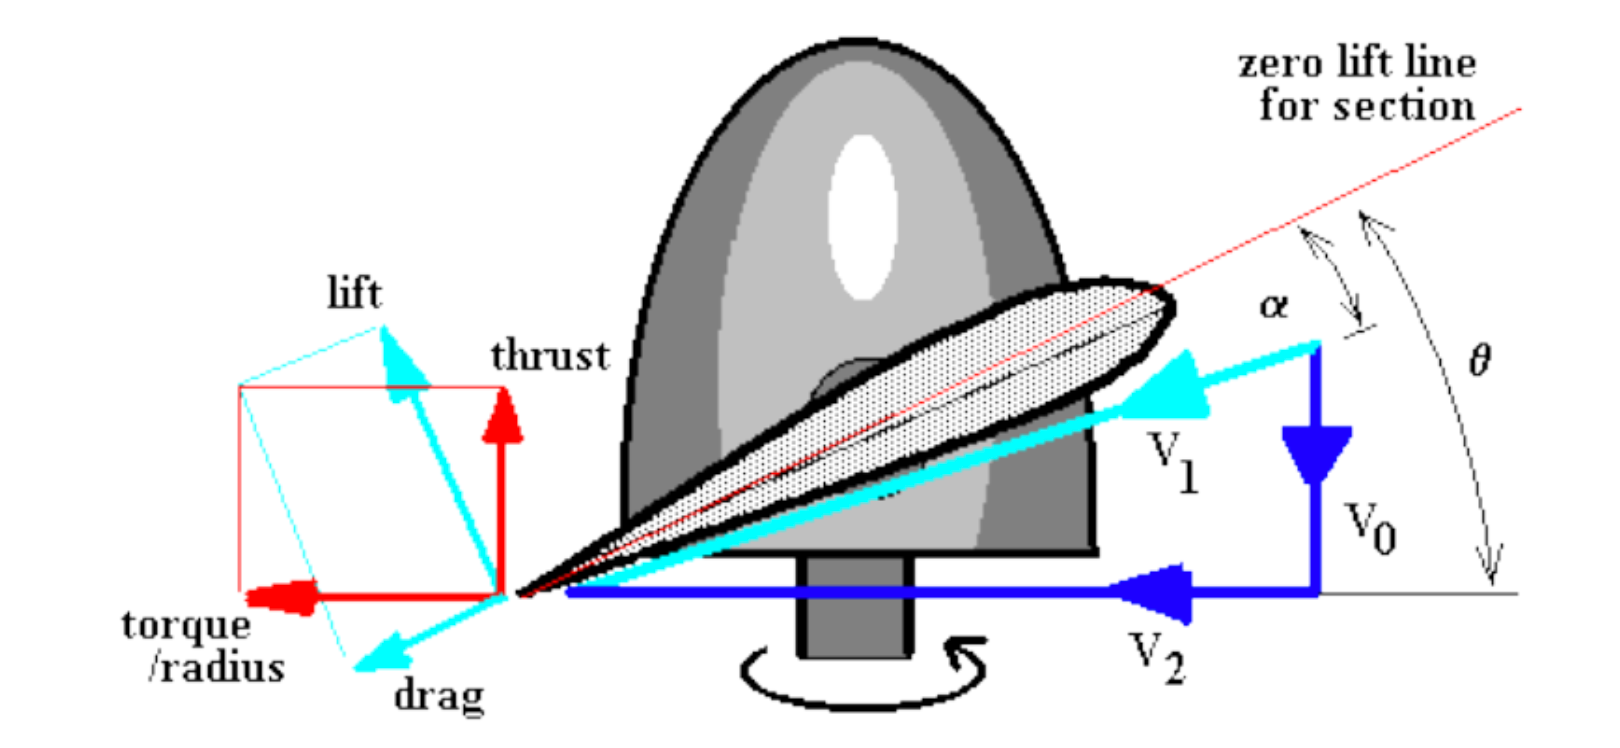

In [35]:
from IPython.display import Image
fname = projpath / 'assets' / 'images' / 'propeller-blade-geometry.png'
Image(filename = fname)

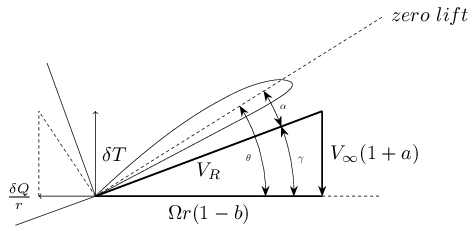

In [48]:
%%tikz -p graphicx,calc -l arrows.meta,angles,quotes
% draw airfoil section
\scope[scale=8,rotate=30]\input{clarky}\endscope
% draw velocity triangle
\draw[ultra thick] 
    (0,0) coordinate (O) -- node[scale=2,below]{$\Omega r(1-b)$}(8,0);
\draw[<-,>={Stealth[length=10pt]},ultra thick] 
    (8,0) -- node[scale=2,right] {$V_\infty(1+a)$} (8,3);
\draw[ultra thick] 
    (O) -- node[scale=2,below] {$V_R$} (8,3) coordinate (p3);
% extend x axis
\draw[thin,dashed] 
    (8,0) -- coordinate (p2)(10,0);
% draw zero lift line
\draw [thin, dashed] 
    (O) -- (32:12) coordinate (p1) node[scale=2,right]{$zero\ lift$};
    
\draw[thin](O) -- (200:3);
\draw[thin](O) -- (110:5);
\draw[thin,->](O) -- node[scale=2,right] {$\delta T$}(0,3);
\draw[thin,->](O) --  (-2,0) node[scale=2,left] {$\frac{\delta Q}{r}$};
\draw[thin,dashed] (O) -- (-2,3);
\draw[thin,dashed] (-2,0) -- (-2,3);
\draw[>={Stealth[length=10pt]}] 
   pic["$\theta$" anchor=north east, draw,<->, angle eccentricity=0.97,angle radius=6cm] {angle=p2--O--p1}
   pic["$\alpha$" anchor=west, draw,<->, angle eccentricity=1.02,angle radius=7cm] {angle=p3--O--p1}
pic["$\gamma$" anchor=west, draw,<->, angle eccentricity=1.02,angle radius=7cm] {angle=p2--O--p3};

For propellers, we use the airfoil zero lift line as a reference. For the A-6 propeller, this which has a flat plate airfoil, this is the chord line of the airfoil. The angle $\theta$ is the pitch angle of the blade. The effective angle of attack, $\alpha$ is the attack is defined by the local total velocity vector $V_R$. This angle is used to obtain the local section lift and drag coefficients needed to calculate the aerodynamic forces on this blade section.

### Element Thrust Calculation

Let $\delta L$ and $\delta L$ be the aerodynamic forces generated by the black section. The resultant force can be resolved into two forces: $\delta T$ along the propeller shaft, and $\delta Q/r$ which is in the plane of the propeller ans is a torque force. The total torque forces of all sections must equal the power supplied to the shaft. 

The thrust force is equal to the mass flow through the section times the axial velocity. This is shown by this equation:

\begin{equation}
\delta T = \dot m\delta V
\end{equation}

Where $\dot m$ is equal to the area of the annulus swept by this element times the local axial velocity times the air density:

\begin{equation}
\dot m = 2\pi r\rho\ {\delta r}V_\infty(1+a)\rho
\end{equation}

Let's use **sympy** to find the final element thrust:


In [167]:
m_dot, delta_r, r = sympy.symbols('m_dot delta_r r')

In [168]:
mdot = 2 * sympy.pi*r*delta_r*V_inf*rho_inf*(1+a)
mdot

2*pi*V_inf*delta_r*r*rho_inf*(a + 1)

In [169]:
deltaV = V_s - V_inf
deltaV

-V_inf + V_s

In [171]:
deltaV = deltaV.subs(V_s,vs)
deltaV.simplify()

2.0*V_inf*a

In [172]:
deltat = mdot*deltaV
deltat.simplify()

4.0*pi*V_inf**2*a*delta_r*r*rho_inf*(a + 1)

### Element Torque Calculation

Let $\delta R$ be the total aerodynamic force generated by the blade section. The actual lift and drag forces act relative to the total blade velocity vector $V_R$. Let $\phi$ be the angle between $\delta R$ and a line perpendicular to $V_R$ angle.  We can get these equations with a little geometry: 

\begin{equation}
\delta T = \cos{(\phi + \gamma)}
\end{equation}

\begin{equation}
\frac{\delta Q}{r} = \delta R\sin{(\phi + \gamma)}
\end{equation}

Also:

\begin{equation}
\tan{\phi} = \frac{\delta D}{\delta L} = \frac{C_d}{C_l}
\end{equation}